In [52]:
#importações e config necessárias
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

warnings.filterwarnings('ignore')

plt.style.use('ggplot')

pd.set_option('display.max_rows', 14)
pd.set_option('display.max_columns', None)


In [53]:
#pré-processamento
df = pd.read_csv('data.csv')
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


## Podemos perceber que existem alguns valores de metragem inválidos, então tiraremos do nosso estudo

In [54]:
df.query('area < 10')

,address,district,area,bedrooms,garage,type,rent,total
962,Rua Engenheiro Bianor,Butantã,1,1,1,Studio e kitnet,2490,2987
1223,Rua Mussumés,Vila Maria Alta,5,1,0,Casa,570,594
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
5323,Rua Solidônio Leite,Vila Ivone,2,2,2,Casa,2500,2711
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351
9898,Rua Visconde de Porto Seguro,Jardim dos Estados,1,4,3,Casa em condomínio,8500,11420
11055,Travessa Santa Filomena,Vila Campo Grande,4,1,0,Casa,630,641


In [55]:
numerical_columns = df.select_dtypes(exclude='object')
non_numerical = df.select_dtypes(include='object')

print(f'Temos {numerical_columns.shape[1]} colunas numéricas e {non_numerical.shape[1]} não numéricas')

Temos 5 colunas numéricas e 3 não numéricas


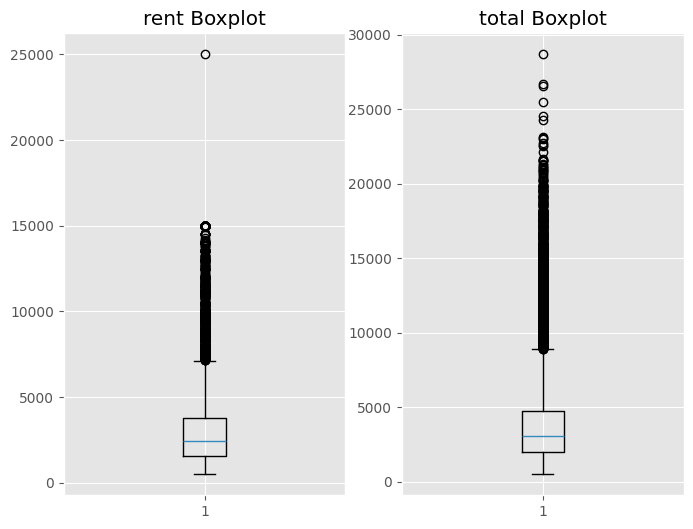

In [56]:
#Análise univariada
fig, ax = plt.subplots(1, 2, figsize=(8,6))

ax[0].boxplot(df['rent'])
ax[0].set_title('rent Boxplot')

ax[1].boxplot(df['total'])
ax[1].set_title('total Boxplot')

plt.show()

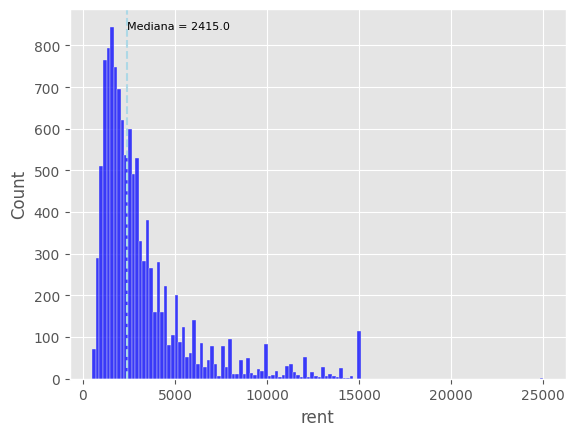

In [57]:
median_rent = df['rent'].median()

sns.histplot(df['rent'], color='blue')
plt.axvline(median_rent,color='lightblue', linestyle='dashed')
plt.text(x=median_rent, y=840, s=f"Mediana = {median_rent}", fontsize=8)
plt.show()

In [58]:
fig = px.histogram(df, x='type')
fig.update_layout(title='Distribuição dos tipos de imóveis', xaxis_title='Tipos', yaxis_title='Contagem')
fig.show()

Podemos ver que a maioria dos alugueis são em imóveis do tipo Apartamento, o que já era esperado. Porém, isso pode indicar um alto nível de desigualdade pois imóveis que oferecem mais conforto podem estar com valores muito distantes dos mais acessíveis.

In [59]:
top_districts = df.groupby('district').size().sort_values(ascending=False).reset_index(name='count')[:10]

top_districts

,district,count
0,Bela Vista,352
1,Vila Mariana,232
2,Jardim Paulista,220
3,Centro,178
4,Pinheiros,159
5,Consolação,157
6,Santana,152
7,Mooca,147
8,Santo Amaro,146
9,Liberdade,141


In [60]:
#Estatísticas descritivas
df[['rent', 'total']].describe()

,rent,total
count,11657.000000,11657.000000
mean,3250.814789,4080.030625
std,2650.711557,3352.480274
min,500.000000,509.000000
25%,1590.000000,1996.000000
50%,2415.000000,3057.000000
75%,3800.000000,4774.000000
max,25000.000000,28700.000000


O desvio-padrão de R\$ 2.650,71 indica valores muito distantes da média, o que pode confirmar a nossa hipótese inicial sobre desigualdade.

In [61]:
df['area'].describe()

,area
count,11657.000000
mean,84.655658
std,74.020536
min,0.000000
25%,40.000000
50%,60.000000
75%,96.000000
max,580.000000


Podemos notar que a media é levemente maior que a mediana, o que indica uma inclinação para direita da distribuição dos dados. Então, possivelmente existem alguns apartamentos com tamanhos muito maiores do que a maioria. Além disso, o desvio padrão apresentado é bem alto, indicando uma grande variação nos tamanhos.

In [62]:
#análise multivariada (bairros mais caros c/ e s/ alphaville)
districts_rent = df.groupby('district')['rent'].mean().sort_values(ascending=False)[:10].reset_index()
districts_rent.columns = ['Distrito', 'Média de aluguel']

districts_rent["Média de aluguel"] = districts_rent["Média de aluguel"].apply(lambda x: 'R$ {:,.2F}'.format(x))

print('Top 10 distritos com maiores média de aluguel')
print(districts_rent)

Top 10 distritos com maiores média de aluguel
                            Distrito Média de aluguel
0        Alphaville Residencial Dois     R$ 15,000.00
1                       Jardim Tango     R$ 15,000.00
2        Alphaville Residencial Plus     R$ 15,000.00
3     Residencial Cinco (alphaville)     R$ 13,600.00
4          Alphaville Residencial Um     R$ 13,500.00
5                      Cidade Jardim     R$ 13,000.00
6                           Pacaembu     R$ 12,054.00
7                      Chácara Meyer     R$ 12,000.00
8         Centro Empresarial Tamboré     R$ 11,833.33
9  Jardim Vitoria Regia (zona Oeste)     R$ 11,820.00


In [63]:
districts_rent2 = df.groupby('district')['rent'].mean().reset_index()
districts_rent2 = districts_rent2[~districts_rent2['district'].str.lower().str.contains('alphaville')]
districts_rent2.columns = ['Distrito', 'Média de aluguel']

top_districts = districts_rent2.sort_values('Média de aluguel', ascending=False)[:10]
top_districts.columns = ['Distrito', 'Média de Aluguel']

print('Top 10 distritos com maiores média de aluguel')
print(top_districts)

Top 10 distritos com maiores média de aluguel
                              Distrito  Média de Aluguel
475                       Jardim Tango      15000.000000
101                      Cidade Jardim      13000.000000
577                           Pacaembu      12054.000000
82                       Chácara Meyer      12000.000000
70          Centro Empresarial Tamboré      11833.333333
505  Jardim Vitoria Regia (zona Oeste)      11820.000000
533                 Jardim dos Estados      11583.333333
248                    Jardim Cordeiro      11250.000000
85               Chácara Santo Antônio      10650.000000
83                Chácara Monte Alegre      10205.000000


In [64]:
fig = px.bar(top_districts, y='Distrito', x='Média de Aluguel', orientation='h', title='Top 10 maiores alugueis', labels={"Média de Alguel": 'Média de aluguel (R$)', 'Distrito': 'Distrito'}, color='Média de Aluguel')
fig.update_yaxes(autorange='reversed')
fig.show()

In [65]:
top_districts.describe()

,Média de Aluguel
count,10.000000
mean,11939.566667
std,1325.275988
min,10205.000000
25%,11333.333333
50%,11826.666667
75%,12040.500000
max,15000.000000


Analisando os bairros com maior média de aluguel podemos perceber que existe um grande range de valores, sendo aproximadamente R$ 5.000,00.

Além disso, o alto valor do desvio-padrão, de R$ 1.325,27, indica o quanto existe uma categorização mesmo em um grupo pequeno.

In [66]:
bottom_districts = df.groupby('district')['rent'].mean().sort_values(ascending=True).reset_index()[:10]
bottom_districts.columns = ['Distrito', 'Média de aluguel']

print('Top 10 bairros mais baratos')
bottom_districts

Top 10 bairros mais baratos


,Distrito,Média de aluguel
0,Jardim Jaçanã,500.0
1,Jardim Inga,600.0
2,Jardim Frei Galvão,629.0
3,Jardim Maraba,630.0
4,Vila Lais,660.0
5,Vila Cardoso Franco,700.5
6,Vila Ramos,710.0
7,Vila São Luís,740.0
8,Sítio do Piqueri,750.0
9,Jardim Vergueiro,759.0


In [67]:
fig = px.bar(bottom_districts, x='Média de aluguel', y='Distrito', title='Média dos alugueis mais baixos', orientation='h', color='Média de aluguel')

fig.update_yaxes(autorange='reversed')
fig.show()

In [68]:
bottom_districts.describe()

,Média de aluguel
count,10.000000
mean,667.850000
std,80.888143
min,500.000000
25%,629.250000
50%,680.250000
75%,732.500000
max,759.000000


Analisando, por outro lado, os bairros de menor média de aluguel, vemos que a disperção também é um pouco alta, onde a média é igual a R\$ 667,85 e temos um desvio-padrão de R\$ 80,00 aproximadamente.

In [69]:
#50 bairros de maiores e menores alugueis

top_districts = districts_rent2.sort_values('Média de aluguel', ascending=False)[:50]
top_districts.columns = ['Distrito', 'Média aluguel']
top_aptos = df[df['district'].isin(top_districts['Distrito'])]

bottom_districts = districts_rent2.sort_values('Média de aluguel', ascending=True)[:50]
bottom_districts.columns = ['Distrito', 'Média aluguel']
bottom_aptos = df[df['district'].isin(bottom_districts['Distrito'])]

bottom_aptos.head()

,address,district,area,bedrooms,garage,type,rent,total
219,Rua Adele Zarzur,Jardim São José (zona Norte),50,1,0,Casa,850,887
489,Rua das Águias Reais,Vila Cardoso Franco,50,2,1,Apartamento,791,1212
538,Rua Celeste Fernandes Dalphorno,Jardim Rosana,40,1,0,Casa,800,949
639,Rua Ulisses Paschoal,Jardim Lourdes (zona Sul),15,1,0,Studio e kitnet,882,1009
1005,Rua Amorim Castro,Vila São Luís,15,1,0,Studio e kitnet,740,1196


In [70]:
top_aptos['class'] = 'Upper'
bottom_aptos['class'] = 'Lower'

fig = go.Figure()

fig.add_trace(go.Box(
    x=top_aptos['class'],
    y=top_aptos['rent'],
    name='Upper',
    marker_color='lightgreen',
    boxpoints='outliers'
    ))

fig.add_trace(go.Box(
    x=bottom_aptos['class'],
    y=bottom_aptos['rent'],
    name='Upper',
    marker_color='lightblue',
    boxpoints='outliers'
    ))
fig.update_layout(title='Aluguel por classe',
                  xaxis=dict(title='Classe'),
                  yaxis=dict(title='Aluguel'),
                  showlegend=True
                  )
fig.show()

In [71]:
rent_by_type_top = top_aptos.groupby('type')['rent'].mean().reset_index()
rent_by_type_bottom = bottom_aptos.groupby('type')['rent'].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x=rent_by_type_top['type'],
                     y=rent_by_type_top['rent'],
                     name='Alto'))

fig.add_trace(go.Bar(x=rent_by_type_bottom['type'],
                     y=rent_by_type_bottom['rent'],
                     name='Baixo'))

fig.update_layout(title='Média por tipos de padrão de imóveis: Alto vs Baixo',
                  xaxis_title = 'Tipo de imóvel',
                  yaxis_title= 'Média de aluguel',
                  width=600,
                  height=400)

fig.show()

In [72]:
area_by_type_top = top_aptos.groupby('type')['area'].mean().reset_index()
area_by_type_bottom = bottom_aptos.groupby('type')['area'].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x=area_by_type_top['type'],
              y=area_by_type_top['area'],
              name='Alto'))

fig.add_trace(go.Bar(x=area_by_type_bottom['type'],
              y=area_by_type_bottom['area'],
              name='Baixo'))

fig.update_layout(width=600, height=400, title='Area por tipo de padrão do imóvel: Alto vs Baixo', xaxis_title='Tipo de imóvel', yaxis_title='Metros quadrados')

In [73]:
top_aptos_bedrooms = top_aptos['bedrooms'].value_counts().reset_index()
top_aptos_bedrooms.columns = ['N° de quartos', 'Quantidade']
top_aptos_bedrooms = top_aptos_bedrooms.sort_values('N° de quartos', ascending=True)

bottom_aptos_bedrooms = bottom_aptos['bedrooms'].value_counts().reset_index()
bottom_aptos_bedrooms.columns = ['N° de quartos', 'Quantidade']
bottom_aptos_bedrooms = bottom_aptos_bedrooms.sort_values('N° de quartos', ascending=True)

fig = go.Figure()

fig.add_trace(go.Bar(x=top_aptos_bedrooms['N° de quartos'],
                     y=top_aptos_bedrooms['Quantidade'],
                     name='Alto'))

fig.add_trace(go.Bar(x=bottom_aptos_bedrooms['N° de quartos'],
                     y=bottom_aptos_bedrooms['Quantidade'],
                     name='Baixo'))

fig.update_layout(title='Quantidade de quartos pelo padrão do imóvel: Alto vs Baixo',
                  xaxis_title='N° de quartos',
                  yaxis_title='Quantidade')

fig.show()

In [74]:
top_aptos_garage = top_aptos['garage'].value_counts().reset_index()
top_aptos_garage.columns = ['N° de vagas', 'Quantidade']
top_aptos_garage = top_aptos_garage.sort_values('N° de vagas', ascending=True)

bottom_aptos_garage = bottom_aptos['garage'].value_counts().reset_index()
bottom_aptos_garage.columns = ['N° de vagas', 'Quantidade']
bottom_aptos_garage = bottom_aptos_garage.sort_values('N° de vagas', ascending=True)

fig = go.Figure()

fig.add_trace(go.Bar(x=top_aptos_garage['N° de vagas'],
                     y=top_aptos_garage['Quantidade'],
                     name='Alto'))

fig.add_trace(go.Bar(x=bottom_aptos_garage['N° de vagas'],
                     y=bottom_aptos_garage['Quantidade'],
                     name='Baixo'))

fig.update_layout(title='Quantidade de vagas pelo padrão do imóvel: Alto vs Baixo',
                  xaxis_title='N° de vagas',
                  yaxis_title='Quantidade')

fig.show()

Ao separarmos o dataset em duas categorias (imóveis de alto padrão e baixo padrão) é possível entender de forma mais precisa o quanto as categorias estão distantes entre si. Imóveis com mais opções oferecem um maior conforto, mas ao mesmo tempo são consideravelmente mais caros.

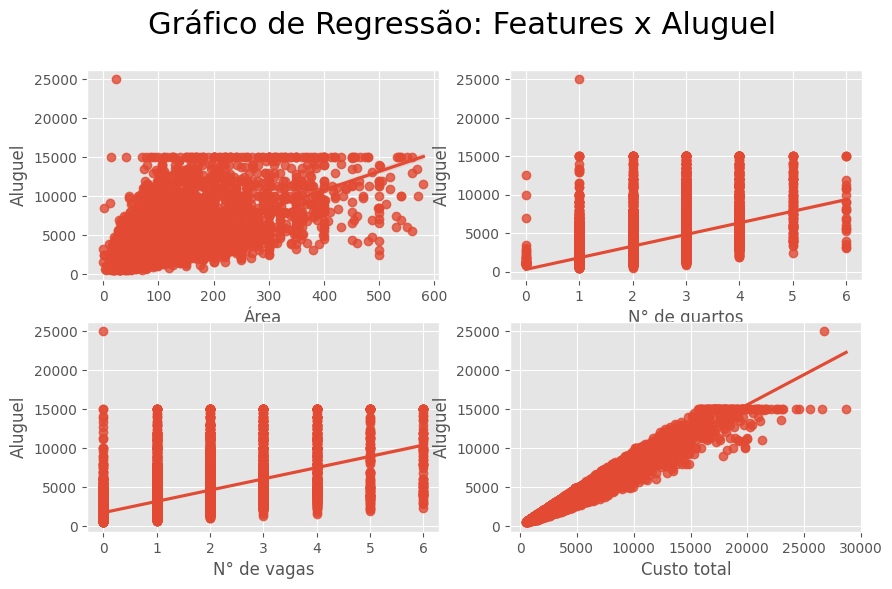

In [80]:
fig, axs = plt.subplots(2,2, figsize=(10,6))

sns.regplot(data=df, x='area', y='rent', ax=axs[0,0])
sns.regplot(data=df, x='bedrooms', y='rent', ax=axs[0,1])
sns.regplot(data=df, x='garage', y='rent', ax=axs[1,0])
sns.regplot(data=df, x='total', y='rent', ax=axs[1,1])

axs[0,0].set_xlabel('Área')
axs[0,0].set_ylabel('Aluguel')

axs[0,1].set_xlabel('N° de quartos')
axs[0,1].set_ylabel('Aluguel')

axs[1,0].set_xlabel('N° de vagas')
axs[1,0].set_ylabel('Aluguel')

axs[1,1].set_xlabel('Custo total')
axs[1,1].set_ylabel('Aluguel')

fig.suptitle('Gráfico de Regressão: Features x Aluguel', fontsize=22)
fig.show()

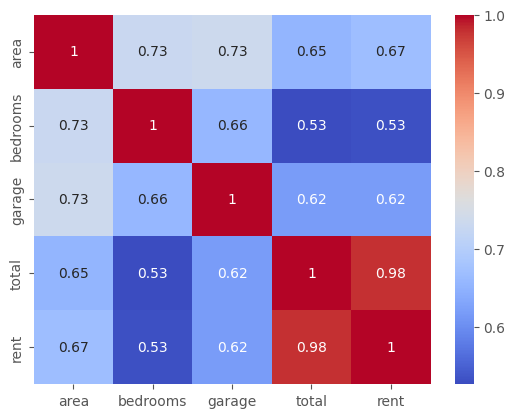

In [83]:
subset = df[['area', 'bedrooms', 'garage', 'total',  'rent']]

subset_corr = subset.corr()

sns.heatmap(subset_corr, annot=True, cmap='coolwarm')
plt.show()

Inicialmente, ao analisármos as features e suas correlações com o valor do aluguel, não aparece nenhuma correlação significante. No entanto, quando usamos a matriz de correlação combinada ao mapa de calor podemos perceber que existem duas correlações interessantes de se considerar. O tamanho em metros quadrados e a quantidade de vagas possuem uma correlação razoável para forte com o valor do aluguel.


In [89]:
types = df.groupby('type')['rent'].mean().reset_index().sort_values('rent', ascending=False)

types

,type,rent
2,Casa em condomínio,3912.551867
1,Casa,3471.924674
0,Apartamento,3356.902697
3,Studio e kitnet,2127.825489


## Conclusão

A análise exploratória feita neste estudo tem como objetivo esclarecer as hipóteses criadas inicialmente e gerar alguns insights a partir disso. A partir das correlações analisadas, pode-se concluir que existe um nível de desigualdade social a partir da análise feita em relação aos preços de aluguel e os bairros mais requisitados. Com isso, esta análise pode auxiliar tanto em um indicador social, quanto para alguém que busca um imóvel em São Paulo, pois é possível buscar as características de uma residência em detrimento ao orçamento que se procura.